## 2D Linear Regression Using Ordinary Least Squares (OLS)

Essentially we have two features instead of one influencing our system

Our process will be:

* Loading the data
* Exploring the data
* Adding bias to our input 
* Solve for weights using OLS
* Creating a plane of best fit
* Make a Prediction
* Determining how well the model performed

We'll be using the following equations:

where the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^T x = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2$$

where $\theta$ is computed using OLS

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

where:

$X^T$ is the transpose of the X matrix and,
$(X^TX)^{-1}$ is the inverse of the $X^TX$ matrix

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Loading the Data

In [2]:
data = np.loadtxt('data/housing.txt', delimiter=',')
m = len(data)
n = len(data[0]) - 1
print("Shape of data", data.shape)
print("Number of samples", m)
print("Number of features", n)
X, y = data[:, :n], data[:, n]

Shape of data (47, 3)
Number of samples 47
Number of features 2


## Exploring the Data

### Plotting the Data

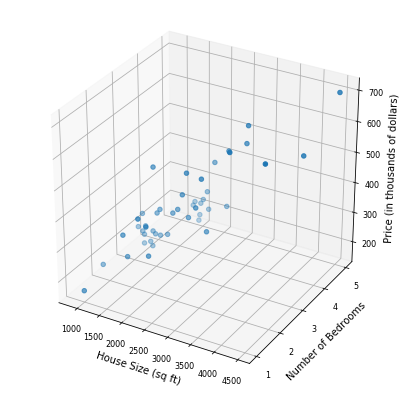

In [3]:
# Scatter Plot 
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y/1000)

ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.zaxis.set_tick_params(labelsize=8)

plt.yticks(np.arange(1, 6, 1))

ax.set_xlabel('House Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (in thousands of dollars)');

## Visualizing the shape of our data

X is a feature matrix that is m x n where:

* m = number of samples
* n = number of features

y is our ouput vector that is m x 1

In [4]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (47, 2)
The shape of y is (47,)


## Adding bias to our input

This is the process of adding the $\theta_0$ in

$$ h_\theta(x) = \theta^T x = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2$$

To do this we add a column of 1's to our feature matrix and call it $x_0$

In [5]:
# here we add a column of 1's to X for our bias (intercept term) we'll use concatenate for numpy arrays with shape (m,n)
# Note: concatenate will add a column of 1's to X each time this cell is run
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print("Shape of X is", X.shape)
print("Example of a feature vector", X[0])

Shape of X is (47, 3)
Example of a feature vector [1.000e+00 2.104e+03 3.000e+00]


## Solve for weights using OLS

Basically we just need to transform the following function into python code

$$\theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [6]:
# calculate the weights not using gradient descent
theta = np.linalg.pinv(X.T@X)@X.T@y
print("Shape of theta is", theta.shape)
print("theta is", theta)

Shape of theta is (3,)
theta is [89597.90954361   139.21067402 -8738.01911255]


## Creating a plane of best fit

We'll take our input matrix X and pretend we dont know our output vector y

Then using the weights we found we'll try and predict what y would be at any point

In [9]:
h = X@theta
print("Shape of h is", h.shape)

# Remember X[:, 0] will be all 1's

# Scatter Plot with plane of best fit
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,1], X[:,2], y/1000)
ax.scatter3D(X[:,1], X[:,2], h/1000, c='green')
ax.plot(X[:,1], X[:,2], h/1000, c='red')

ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.zaxis.set_tick_params(labelsize=8)

plt.yticks(np.arange(1, 6, 1))

ax.set_xlabel('House Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (in thousands of dollars)');

Shape of h is (47,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Making a prediction

Now we can create an input vector and get an estimated price for the home 

In [101]:
# input_vec = [size of house (sq ft), number of bedrooms]
input_vec = [1650, 3]

# add a bias since all inputs must begin with 1
input_vec_bias = np.append(1, input_vec)

# make a prediction
profit = theta.T@input_vec_bias

print("Input vector", input_vec)
print("Input vector with bias", input_vec_bias)
print("theta", theta)
print("Profit", profit)

Input vector [1650, 3]
Input vector with bias [   1 1650    3]
theta [89597.90954361   139.21067402 -8738.01911255]
Profit 293081.4643349892


## Determine how well the model performed

We need some numerical measure to see how well our model performed

For this we can use $R^2$ (R-Squared)

We ususally use this for any regression not just Linear Regression

The definition for R-Squared is the following:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where: 

$SS_{res}$ is the sum of squared residual 

and

$SS_{tot}$ is the sum of squared total

These are defined as:

$$SS_{res} = \sum^N_{i=1}(y_i - \hat{y_i})^2$$

<br />

$$SS_{tot} = \sum^N_{i=1}(y_i - \bar{y})^2$$

$R^2 = 1$ is a perfect model

$R^2 = 0$ is basically the average (50%)

$R^2 = -$ is worse than just computing the average

In [103]:
SSres = sum((y-h)**2)

SStot = sum((y-y.mean())**2)

R2 = 1 - SSres/SStot

print('SSres is: ', SSres)
print('SStot is:', SStot)
print('R-squared is: ', R2)

SSres is:  192068324756.66586
SStot is: 719208918474.553
R-squared is:  0.7329450180289142
